In [1]:
# ___/Starting with the data preprocessing 
# First we will change our data from coordinates to plot image form 
# Then we will perfom certain preprocessing fucntion as mentioned in paper
# Then we wiil divide our data in train, test and split 

In [3]:
#Checking the directory

import os 
os.getcwd()

'C:\\Users\\Anshul'

In [4]:
#changing the directory
os.chdir("C:\\Users\\Anshul\\OneDrive\\Desktop\\SVC-2004")

In [6]:
# Setting a path for datasets
path1 = './Task1/'
path2 = './Task2/'

In [8]:
# now all the files name we wil store in the two lists
task1 = next(os.walk(path1))[2]
task2 = next(os.walk(path2))[2]

In [9]:
# Quick checking that we have 1600 signature in two tasks
len(task1), len(task2)

(1618, 1610)

In [11]:
#removing duplicates files
for i in task1:
    if '(' in i:
        os.remove(path1+i)

In [12]:
# Same for task2
for i in task2:
    if '(' in i:
        os.remove(path2+i)

In [14]:
# re-checking that we have 1600 signature in two tasks
task1 = next(os.walk(path1))[2]
task2 = next(os.walk(path2))[2]

len(task1), len(task2)

(1600, 1600)

In [16]:
# Now we will store files in user vise directories then
# for that rename someof files that have not proper name

# Renaming of files for data preprocessing
for i in task1:
    if i[-6] == 'S':
        os.rename(path1+i, path1+i[:-6]+'S0'+i[-5]+'.TXT')
        
# same for task2
for i in task2:
    if i[-6] == 'S':
        os.rename(path2+i, path2+i[:-6]+'S0'+i[-5]+'.TXT')

In [18]:
# everytime we rename or update names of files we have to change list
task1 = next(os.walk(path1))[2]
task2 = next(os.walk(path2))[2]

In [19]:
# above we convert file name 'UXSN' to 'UXS0N', where 'X' and 'N' belongs to single digit int
# Now we will convert  file name 'UXS0N' to 'U0XS0N', where'X' and 'N' belongs to single digit int

for i in task1:
    if len(i) == 9:
        d = i[1] 
        os.rename(path1+i, path1+'U'+'0'+d +i[-7:])


In [20]:
# Same for task2
for i in task2:
    if len(i) == 9:
        d = i[1] 
        os.rename(path2+i, path2+'U'+'0'+d +i[-7:])


In [21]:
# everytime we rename or update names of files we have to change list
task1 = next(os.walk(path1))[2]
task2 = next(os.walk(path2))[2]

In [22]:
len(task1), len(task2)

(1600, 1600)

In [23]:
# Now we will convert coordinates to plot and save plot as image using matplotlib 
# we will make two new directories to save images

os.mkdir('Task1_')
os.mkdir('Task2_')

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# function for convert coordinates to images and
# save those images in user vise directories

def coo_to_img(path, new_path, images):
    
    # New images will have extension .png
    extension = 'png'
    
    # Intializing vars
    user_n = '01'
    dirs = []
    
    for u in range(2, 42):
        
        os.mkdir(new_path + user_n)
        dirs.append(new_path + user_n)
        user_n = '0'+ str(u) if u < 10 else str(u)

        
    for img in images:
        with open(path+img,'r') as f:
            
            #for saving the coordinates
            x,y = [],[]
            
            # starting from 2nd element (1st index) bcz 1st element has only number that show
            # numbers of coordinates in files
            for i in list(f)[1:]:
                lst = i.split(" ")
                x.append(int(lst[0]))
                y.append(int(lst[1]))
                
            f, ax = plt.subplots(1,1, figsize=(6,6))
            ax.axis('off')
            plt.plot(x, y)
            
            _path = dirs[int(img[1:3]) -1]
            f.savefig(_path+'/'+img[:-3]+extension)
            plt.close()
    

In [34]:
coo_to_img(path1, './Task1_/', task1)
coo_to_img(path2, './Task2_/', task2)

In [35]:
# Now we have perefctly stored data
# Updating paths for getting images

path1 = './Task1_/'
path2 = './Task2_/'

In [36]:
# Get the list of all directories and sort them
dir_list = next(os.walk(path1))[1]
dir_list.sort()

In [37]:
len(dir_list)

40

In [39]:
# For each person sepregate the genuine signatures from the forged signatures
# Genuine signatures are stored in the list "orig_groups"
# Forged signatures are stored in the list "forged_groups"
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path1+directory)
    images.sort()
    images = [path1+directory+'/'+x for x in images]
    forg_groups.append(images[:20]) # First 20 signatures in each folder are forrged
    orig_groups.append(images[20:]) # Next 250 signatures are genuine

In [40]:
# same for task2
# Get the list of all directories and sort them
dir_list = next(os.walk(path2))[1]
dir_list.sort()

for directory in dir_list:
    images = os.listdir(path2+directory)
    images.sort()
    images = [path2+directory+'/'+x for x in images]
    forg_groups.append(images[:20])
    orig_groups.append(images[20:])

In [41]:
# Quick check to confirm we have data of all the 80 from both of task individuals
len(orig_groups), len(forg_groups)

(80, 80)

In [42]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]


In [43]:
# Quick check to confirm that there are 20 Genuine signatures for each individual
print(orig_lengths)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


In [44]:
# Quick check to confirm that there are 20 Forged signatures for each individual
print(forg_lengths)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


In [45]:
orig_train, orig_val, orig_test = orig_groups[:50], orig_groups[50:64], orig_groups[64:]
forg_train, forg_val, forg_test = forg_groups[:50], forg_groups[50:64], forg_groups[64:]

In [46]:
# Delete unnecessary variables
del orig_groups, forg_groups

In [47]:
# All the images will be converted to the same size before processing
img_h, img_w = 300, 300

In [48]:
# All the necessary modules needed 
import sys
import numpy as np
import pickle
import os
import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


In [49]:
def visualize_sample_signature():
    '''Function to randomly select a signature from train set and
    print two genuine copies and one forged copy'''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 10))
    k = np.random.randint(len(orig_train))
    orig_img_names = random.sample(orig_train[k], 2)
    forg_img_name = random.sample(forg_train[k], 1)
    orig_img1 = cv2.imread(orig_img_names[0], 0)
    orig_img2 = cv2.imread(orig_img_names[1], 0)
    forg_img = plt.imread(forg_img_name[0], 0)
    orig_img1 = cv2.resize(orig_img1, (img_w, img_h))
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h))
    forg_img = cv2.resize(forg_img, (img_w, img_h))

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.axis('off')

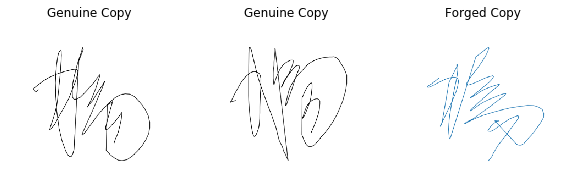

In [50]:
visualize_sample_signature()

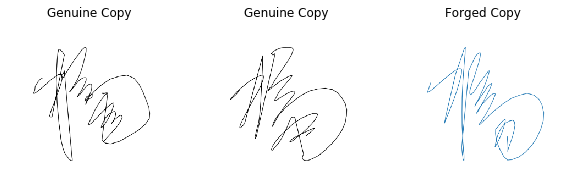

In [51]:
visualize_sample_signature()

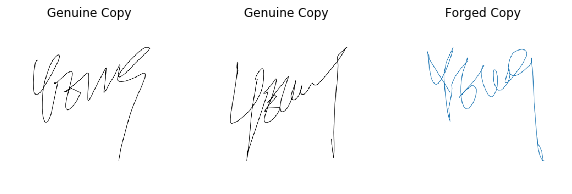

In [52]:
visualize_sample_signature()

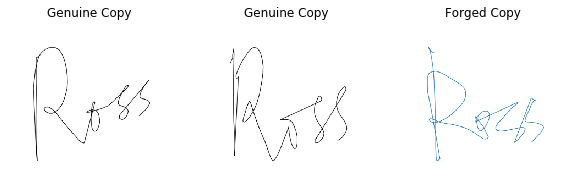

In [53]:
visualize_sample_signature()

(-0.5, 299.5, 299.5, -0.5)

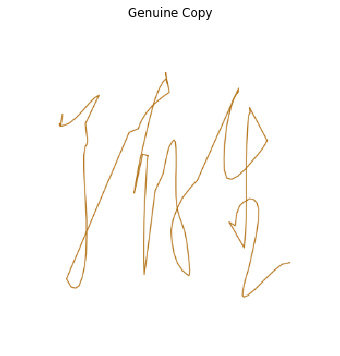

In [82]:
src = cv2.imread(forg_train[0][10], cv2.IMREAD_UNCHANGED)
#percent by which the image is resized
scale_percent = 200

#calculate the 50 percent of original dimensions
#width = int(src.shape[1] * scale_percent / 100)
#height = int(src.shape[0] * scale_percent / 100)

# dsize
#dsize = (width, height)
dsize = (300, 300)

# resize image
output = cv2.resize(src, dsize)

fig, ax1 = plt.subplots(1, 1, figsize = (6, 6))
ax1.imshow(output, cmap='gray')
ax1.set_title('Genuine Copy')
ax1.axis('off')

In [83]:
dsize

(300, 300)

In [84]:
# Now we will perform serval data augmentation 
# They can be a. Change in Aspect ratio b. Rotation by 30 degrees in
# clockwise direction c. Right Shear d. Rotation by 10 degrees clockwise e. Left Shear f. Rotation by 30
# degrees in anticlockwise direction g. Gaussian Noise h. Rotation by 10 degrees anticlockwise

def im_resize(image, scale_pr=0):
    src = cv2.imread(imag, 0)
    
    #percent by which the image is resized
    scale_percent = scale_pr
    
    if scale_percent ==0:
        width = int(src.shape[1] * scale_percent / 100)
        height = int(src.shape[0] * scale_percent / 100)
        
        # dsize
        dsize = (width, height)
        
    else: dsize = (300, 300)
        
    # resize image
    return cv2.resize(src, dsize)


In [85]:
from PIL import Image
img  = Image.open(orig_train[0][0])
type(img)

PIL.PngImagePlugin.PngImageFile

(-0.5, 589.5, 589.5, -0.5)

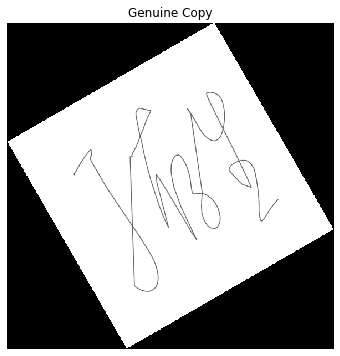

In [87]:
from scipy import ndimage

#rotation angle in degree
src = cv2.imread(orig_train[0][0], 0)
rotated = ndimage.rotate(src, 30)

fig, ax1 = plt.subplots(1, 1, figsize = (6, 6))
ax1.imshow(rotated, cmap='gray')
ax1.set_title('Genuine Copy')
ax1.axis('off')

In [88]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [91]:
src = cv2.imread(orig_train[0][0], 0)
img = rotate_image(src, 30)

(-0.5, 431.5, 431.5, -0.5)

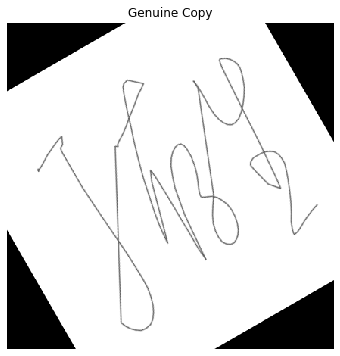

In [96]:
fig, ax1 = plt.subplots(1, 1, figsize = (6, 6))
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Genuine Copy')
ax1.axis('off')

In [97]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

(-0.5, 431.5, 431.5, -0.5)

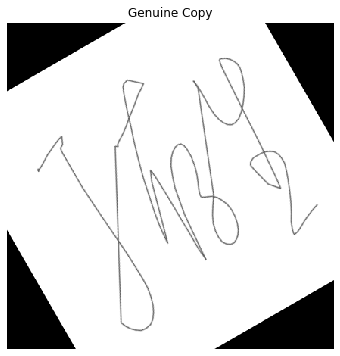

In [106]:
img = rotate(src, 30)
fig, ax1 = plt.subplots(1, 1, figsize = (6, 6))
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Genuine Copy')
ax1.axis('off')

In [115]:
src = cv2.imread(orig_train[0][0])
img1 = rotate(src, 30)

In [116]:
# opencv loads the image in BGR, convert it to RGB
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
lower_white = np.array([220, 220, 220], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)
mask = cv2.inRange(img, lower_white, upper_white)  # could also use threshold
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))  # "erase" the small white points in the resulting mask
mask = cv2.bitwise_not(mask)  # invert mask

# load background (could be an image too)
bk = np.full(img.shape, 255, dtype=np.uint8)  # white bk

# get masked foreground
fg_masked = cv2.bitwise_and(img, img, mask=mask)

# get masked background, mask must be inverted 
mask = cv2.bitwise_not(mask)
bk_masked = cv2.bitwise_and(bk, bk, mask=mask)
                   
# combine masked foreground and masked background 
final = cv2.bitwise_or(fg_masked, bk_masked)
mask = cv2.bitwise_not(mask)  # revert mask to origina
                   

(-0.5, 431.5, 431.5, -0.5)

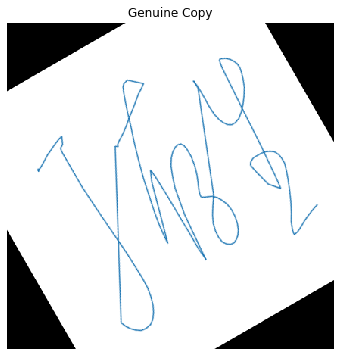

In [117]:
fig, ax1 = plt.subplots(1, 1, figsize = (6, 6))
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Genuine Copy')
ax1.axis('off')

In [119]:
fig.savefig('sss.tif')

(-0.5, 431.5, 431.5, -0.5)

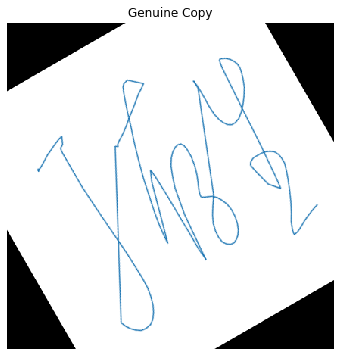

In [110]:
img1 = rotate(img, 30)
fig, ax1 = plt.subplots(1, 1, figsize = (6, 6))
ax1.imshow(img1, cmap = 'gray')
ax1.set_title('Genuine Copy')
ax1.axis('off')

NameError: name 'os' is not defined